# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [8]:
checkpoint_filepath = 'all/'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='max')
    



vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
vgg16.trainable = False
model = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',name='feature_dense'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4,activation='softmax')
])
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

#### [5 points] Train Model

In [9]:
#FIT MODEL
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit(train_batches, epochs=100, validation_data=valid_batches,batch_size=5, 
                    steps_per_epoch=STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID, callbacks=[checkpoint])
model.load_weights(checkpoint_filepath)

C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 2.3386 - accuracy: 0.2233
Epoch 00001: val_accuracy improved from -inf to 0.24000, saving model to all\
21/21 [==============================] - 24s 1s/step - loss: 2.3386 - accuracy: 0.2233 - val_loss: 1.4334 - val_accuracy: 0.2400
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.6696 - accuracy: 0.1748
Epoch 00002: val_accuracy improved from 0.24000 to 0.28000, saving model to all\
21/21 [==============================] - 24s 1s/step - loss: 1.6696 - accuracy: 0.1748 - val_loss: 1.4295 - val_accuracy: 0.2800
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.4390 - accuracy: 0.2670
Epoch 00003: val_accuracy improved from 0.28000 to 0.32000, saving model to all\
21/21 [==============================] - 26s 1s/step - loss: 1.4390 - accuracy: 0.2670 - val_loss: 1.3384 - val_accuracy: 0.3200
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.5222 - accuracy: 

Epoch 30/100
21/21 [==============================] - ETA: 0s - loss: 0.9748 - accuracy: 0.5922
Epoch 00030: val_accuracy improved from 0.64000 to 0.68000, saving model to all\
21/21 [==============================] - 26s 1s/step - loss: 0.9748 - accuracy: 0.5922 - val_loss: 0.8821 - val_accuracy: 0.6800
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 1.0010 - accuracy: 0.5437
Epoch 00031: val_accuracy did not improve from 0.68000
21/21 [==============================] - 27s 1s/step - loss: 1.0010 - accuracy: 0.5437 - val_loss: 0.8406 - val_accuracy: 0.6000
Epoch 32/100
21/21 [==============================] - ETA: 0s - loss: 1.0474 - accuracy: 0.4854
Epoch 00032: val_accuracy did not improve from 0.68000
21/21 [==============================] - 26s 1s/step - loss: 1.0474 - accuracy: 0.4854 - val_loss: 0.8950 - val_accuracy: 0.6000
Epoch 33/100
21/21 [==============================] - ETA: 0s - loss: 0.9262 - accuracy: 0.6019
Epoch 00033: val_accuracy did not impr

Epoch 59/100
21/21 [==============================] - ETA: 0s - loss: 0.8243 - accuracy: 0.5874
Epoch 00059: val_accuracy did not improve from 0.72000
21/21 [==============================] - 27s 1s/step - loss: 0.8243 - accuracy: 0.5874 - val_loss: 0.7294 - val_accuracy: 0.6400
Epoch 60/100
21/21 [==============================] - ETA: 0s - loss: 0.8393 - accuracy: 0.5922
Epoch 00060: val_accuracy did not improve from 0.72000
21/21 [==============================] - 27s 1s/step - loss: 0.8393 - accuracy: 0.5922 - val_loss: 0.6873 - val_accuracy: 0.6800
Epoch 61/100
21/21 [==============================] - ETA: 0s - loss: 0.8910 - accuracy: 0.5777
Epoch 00061: val_accuracy did not improve from 0.72000
21/21 [==============================] - 27s 1s/step - loss: 0.8910 - accuracy: 0.5777 - val_loss: 0.6655 - val_accuracy: 0.7200
Epoch 62/100
21/21 [==============================] - ETA: 0s - loss: 0.7639 - accuracy: 0.6699
Epoch 00062: val_accuracy did not improve from 0.72000
21/21 [==

#### [5 points] Plot Accuracy and Loss During Training
### *** There is a typo in the plot title, it should be 100 epochs ***

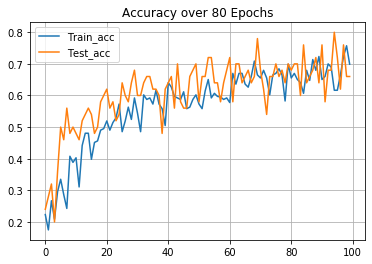

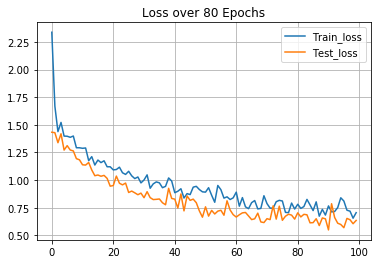

In [10]:
import matplotlib.pyplot as plt


plt.title('Accuracy over 80 Epochs')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.title('Loss over 80 Epochs')
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Testing Model

In [30]:
vgg16.trainable = True
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36/36 [==============================] - 4s 107ms/step - loss: 0.7923 - accuracy: 0.6667
Test loss: 0.7922794818878174
Test accuracy: 0.6666666865348816


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->